In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('weatherAUS.csv')
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64


In [8]:
df.replace("NA", np.nan, inplace=True)
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [9]:
locations = df['Location'].unique()
print(locations)

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [10]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numerical columns using group mean or fallback to global mean
df[num_cols] = df.groupby('Location')[num_cols].transform(lambda x: x.fillna(x.mean()))
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())  # Fill any remaining NaN values

# Fill categorical columns using group mode or fallback to global mode
for col in cat_cols:
    df[col] = df.groupby('Location')[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df[col].mode()[0]))

print(df)


              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6     5.436053   
1       2008-12-02   Albury      7.4     25.1       0.0     5.436053   
2       2008-12-03   Albury     12.9     25.7       0.0     5.436053   
3       2008-12-04   Albury      9.2     28.0       0.0     5.436053   
4       2008-12-05   Albury     17.5     32.3       1.0     5.436053   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0     5.436053   
145455  2017-06-21    Uluru      2.8     23.4       0.0     5.436053   
145456  2017-06-22    Uluru      3.6     25.3       0.0     5.436053   
145457  2017-06-23    Uluru      5.4     26.9       0.0     5.436053   
145458  2017-06-24    Uluru      7.8     27.0       0.0     5.436053   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0       7.654143           W           44.0          W  ... 

In [11]:
print(df[num_cols].corr())

                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.735216  0.103842     0.362115  0.057255   
MaxTemp        0.735216  1.000000 -0.074553     0.451563  0.342804   
Rainfall       0.103842 -0.074553  1.000000    -0.036479 -0.175422   
Evaporation    0.362115  0.451563 -0.036479     1.000000  0.305005   
Sunshine       0.057255  0.342804 -0.175422     0.305005  1.000000   
WindGustSpeed  0.173611  0.066199  0.127818     0.145258 -0.024657   
WindSpeed9am   0.174539  0.013978  0.086544     0.143024  0.009470   
WindSpeed3pm   0.172590  0.049947  0.056368     0.090067  0.034424   
Humidity9am   -0.235219 -0.504777  0.222637    -0.389951 -0.369722   
Humidity3pm    0.000660 -0.508560  0.250605    -0.304029 -0.465421   
Pressure9am   -0.423310 -0.307693 -0.160175    -0.212098  0.031820   
Pressure3pm   -0.433792 -0.396855 -0.120777    -0.233710 -0.016603   
Cloud9am       0.037949 -0.234547  0.162237    -0.161971 -0.539278   
Cloud3pm      -0.007

In [12]:
LOCATION = 'NorfolkIsland'
df_filter = df[df['Location'] == LOCATION]
avg = df_filter['Humidity9am'].mean()

print(f"Average humidity at 9am in {LOCATION} is {avg}")

Average humidity at 9am in NorfolkIsland is 70.80680272108843


In [13]:

columns = ['Temp3pm', 'Pressure3pm', 'Humidity3pm']
# columns = ['Temp9am', 'Pressure9am', 'Humidity9am']
print(df[columns].corr())

              Temp3pm  Pressure3pm  Humidity3pm
Temp3pm      1.000000    -0.365880    -0.558772
Pressure3pm -0.365880     1.000000     0.051639
Humidity3pm -0.558772     0.051639     1.000000


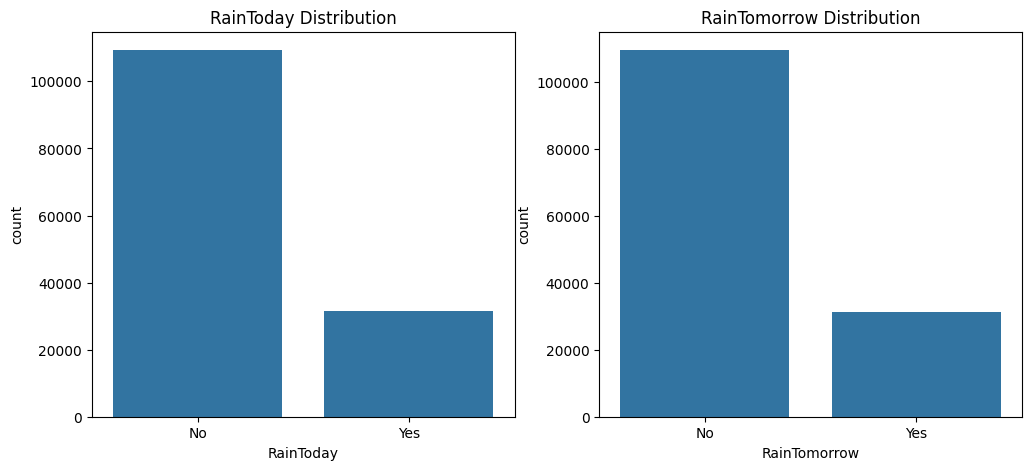

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for RainToday & RainTomorrow
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=df['RainToday'], ax=ax[0])
ax[0].set_title("RainToday Distribution")

sns.countplot(x=df['RainTomorrow'], ax=ax[1])
ax[1].set_title("RainTomorrow Distribution")

plt.show()

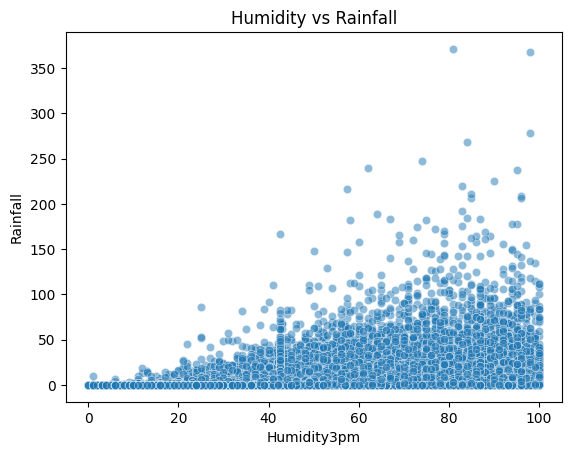

In [15]:
sns.scatterplot(x=df['Humidity3pm'], y=df['Rainfall'], alpha=0.5)
plt.title("Humidity vs Rainfall")
plt.show()

In [16]:

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['RainToday']= label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow']= label_encoder.fit_transform(df['RainTomorrow'])
columns = ['RainToday', 'RainTomorrow']
df[columns].corr()

,RainToday,RainTomorrow
RainToday,1.000000,0.313097
RainTomorrow,0.313097,1.000000


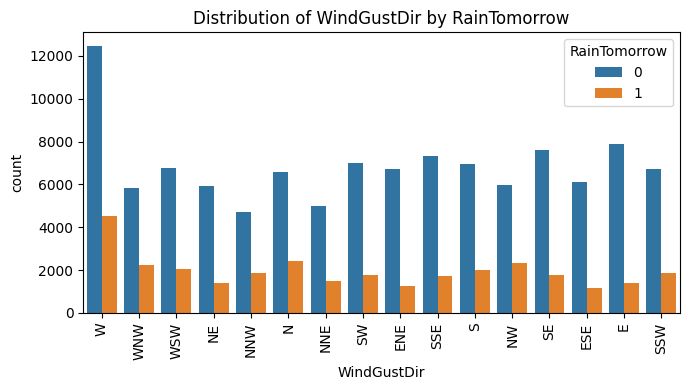

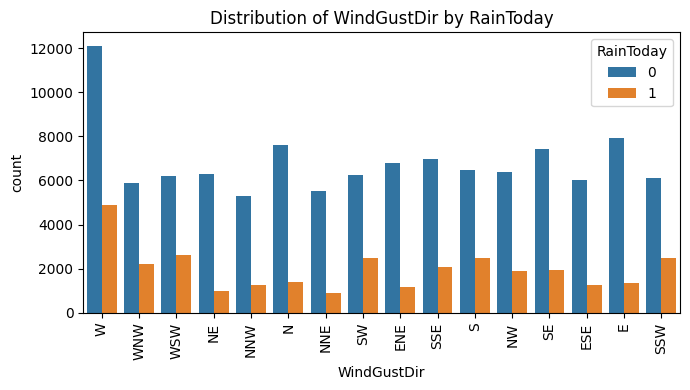

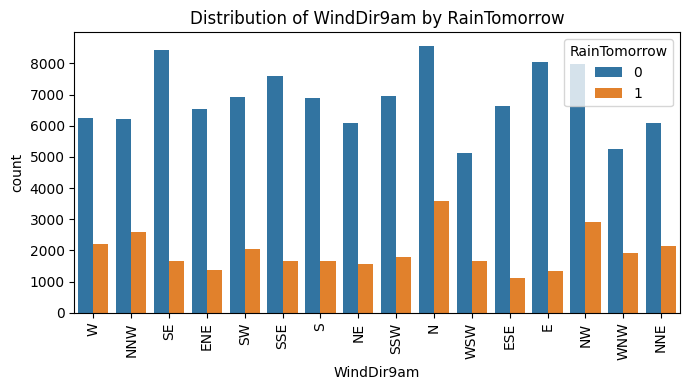

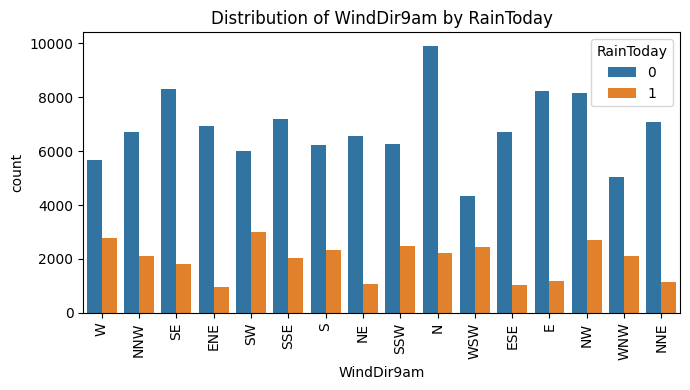

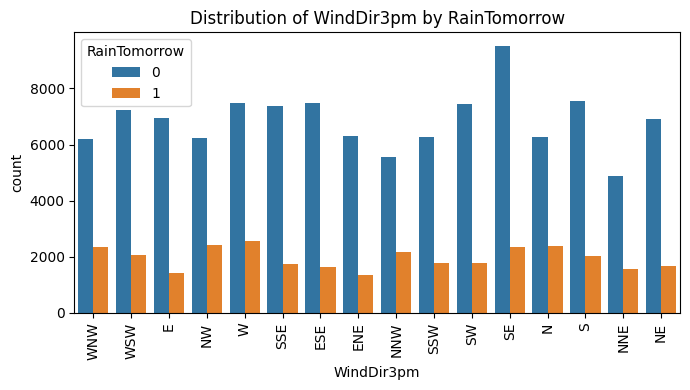

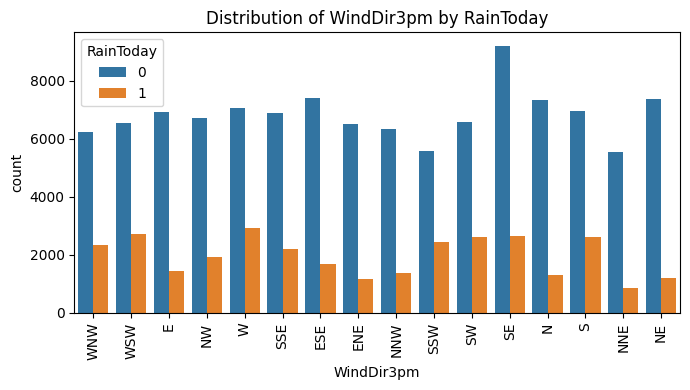

In [18]:
for col in cat_cols:
  if col not in ['RainToday', 'RainTomorrow', 'Location', 'Date']:  # Exclude columns
    plt.figure(figsize=(7, 4))
    sns.countplot(x=col, hue='RainTomorrow', data=df)
    plt.title(f'Distribution of {col} by RainTomorrow')
    plt.xticks(rotation=90) # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
    print("\n")

    plt.figure(figsize=(7, 4))
    sns.countplot(x=col, hue='RainToday', data=df)
    plt.title(f'Distribution of {col} by RainToday')
    plt.xticks(rotation=90) # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
    print("\n")